<div class="alert alert-block alert-info">
    <h1>Análisis de Series Temporales - 2023</h1>
    <h3>Trabajo Practico</h3>
    <h5>Grupo 4</h5>
        <p>Docente: Rodrigo Del Rosso<p>
        <p>Asistentes: Braian Drago <p>
        <p>Integrantes: Garnica Hernán - Scime Silvia
</div>

Importamos modulos a utilizar

In [83]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pmdarima as pm

import warnings
warnings.filterwarnings('ignore')

####  Leemos los datos a trabajar


In [84]:
url='https://raw.githubusercontent.com/jiang-011/AST_G4/main/dataset/Kilometros_TP.csv'
raw_csv_data = pd.read_csv(url, sep=',', decimal='.')
df_km=raw_csv_data.copy()

#### Breve resumen del dataset


In [85]:
print(df_km.columns)

Index(['Fecha', 'KM'], dtype='object')


In [86]:
df_km.describe(include='all')

,Fecha,KM
count,761,761.000000
unique,761,NaN
top,2023-03-18,NaN
freq,1,NaN
mean,NaN,73506.130891
std,NaN,23975.028897
min,NaN,18.976000
25%,NaN,52063.096000
50%,NaN,75190.790000
75%,NaN,96904.004000


In [87]:
df_km.head(10)

,Fecha,KM
0,2023-03-18,66686.513
1,2023-05-09,105009.277
2,2023-02-28,80447.065
3,2023-03-06,103403.154
4,2023-03-10,102574.717
5,2023-05-11,104149.399
6,2023-03-21,102278.464
7,2023-04-24,103627.203
8,2023-04-18,103366.435
9,2023-05-31,103403.519


In [88]:
df_km.tail(10)

,Fecha,KM
751,2022-04-09,48305.086
752,2022-01-29,47482.883
753,2023-07-23,45117.943
754,2022-01-11,50103.326
755,2022-12-18,17554.422
756,2022-04-26,23536.646
757,2023-06-13,47.508
758,2022-10-12,49.673
759,2022-05-17,54.524
760,2022-10-13,18.976


Adaptamos el dataset para trabajarlo segun sus series temporales

In [89]:
df_km.Fecha = pd.to_datetime(df_km.Fecha, dayfirst = True)

In [90]:
df_km.Fecha.describe()

count                              761
mean     2022-10-15 04:07:53.061760768
min                2021-09-30 00:00:00
25%                2022-04-08 00:00:00
50%                2022-10-15 00:00:00
75%                2023-04-23 00:00:00
max                2023-10-31 00:00:00
Name: Fecha, dtype: object

Aplicamos filtro de 2 años de duración al campo Fecha (2021-10-01-2023-10-31)

In [91]:
df_km = df_km[(df_km['Fecha'] >= '2021-10-01') & (df_km['Fecha'] <= '2023-10-31')]
df_km = df_km.sort_values(by=['Fecha'], ascending=True)

In [92]:
df_km.head(10)

,Fecha,KM
323,2021-10-01,73177.190
272,2021-10-02,49300.256
234,2021-10-03,34024.972
315,2021-10-04,73453.515
152,2021-10-05,73722.635
80,2021-10-06,73465.563
572,2021-10-07,49462.478
265,2021-10-08,35282.426
307,2021-10-09,48384.782
29,2021-10-10,34785.451


In [93]:
df_km.tail(10)

,Fecha,KM
333,2023-10-22,47321.881
450,2023-10-23,101572.556
594,2023-10-24,101884.237
52,2023-10-25,102691.406
403,2023-10-26,102253.728
75,2023-10-27,102590.551
337,2023-10-28,62622.827
748,2023-10-29,44060.420
390,2023-10-30,101843.308
196,2023-10-31,102381.640


In [94]:
from skimpy import skim

In [95]:
skim(df_km)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 760    │ │ datetime64  │ 1     │                                                          │
│ │ Number of columns │ 2      │ │ float64     │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name     ┃ NA  ┃ NA %   ┃ mean    ┃ sd      ┃ p0  ┃ p25     ┃ p50     ┃ p75     ┃ p100    ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━┩  │
│ │ KM              │   0 │      0 │   74000 │   24000 │  19 │   52000 │   75000 │   97000 │  110000 │  ▁▅▃▅▇  │  │
│ └─────────────────┴─────┴────────┴─────────┴─────────┴─────┴─────────┴─────────┴─────────┴─────────┴─────────┘  │
│                                                    datetime                                                     │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name            ┃ NA     ┃ NA %      ┃ first               ┃ last                ┃ frequency        ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━┩  │
│ │ Fecha                  │      0 │         0 │     2021-10-01      │     2023-10-31      │ None             │  │
│ └────────────────────────┴────────┴───────────┴─────────────────────┴─────────────────────┴──────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

Seteamos como index del dataset segun el dia

In [96]:
df_km.set_index("Fecha",inplace=True)

In [97]:
df_km.head()

,KM
Fecha,
2021-10-01,73177.190
2021-10-02,49300.256
2021-10-03,34024.972
2021-10-04,73453.515
2021-10-05,73722.635


#### Adaptamos el datset a la frecuencia diaria

In [98]:
df_km=df_km.asfreq('d')
df_km

,KM
Fecha,
2021-10-01,73177.190
2021-10-02,49300.256
2021-10-03,34024.972
2021-10-04,73453.515
2021-10-05,73722.635
...,...
2023-10-27,102590.551
2023-10-28,62622.827
2023-10-29,44060.420


Verificamos existencia de fechas nulas

In [99]:
df_km.isna().sum()

KM    1
dtype: int64

Obtenemos posición del registro con fecha nula

In [100]:
fila_con_na = df_km[df_km.isna().any(axis=1)]  #A REVISAR!!!
#df['KM']=df['KM'].fillna(method='ffill')

In [101]:
print(fila_con_na)

            KM
Fecha         
2023-06-22 NaN


Este día no aparece en el dataset, lo borramos para poder seguir con el análisis.

In [102]:
df_km=df_km.dropna()

Volvemos a verificar existencia de fechas nulas

In [103]:
df_km.isna().sum()

KM    0
dtype: int64

## Punto 2

Visualizamos el dataset teniendo en cuenta la serie temporal

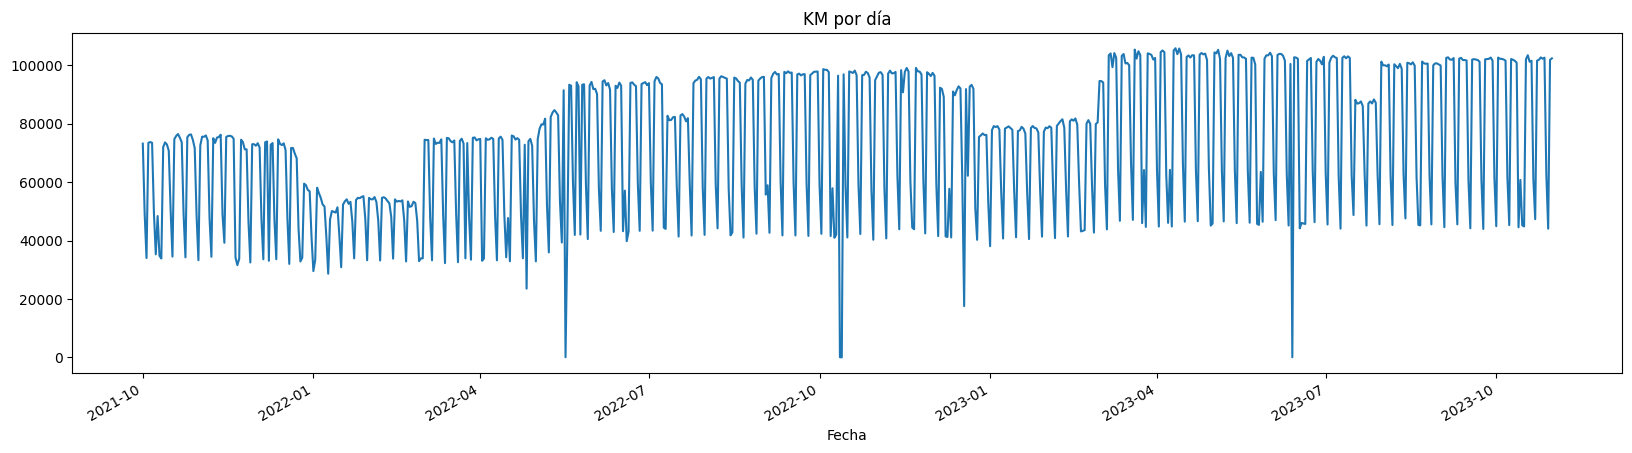

In [104]:
df_km.KM.plot(figsize=(20,5), title = "KM por día")
plt.show()

Observación

El gráfico hace referencia a los kms diarios recorridos por las líneas Urbanas en la ciudad de Buenos Aires. Es la primer visualización de la serie de tiempo y se aprecian algunos valores iguales a 0 kms recorridos en determinadas fechas. Habrá que seguir estudiando a fin de decidir qué pasa con esos datos y el tratamiento pertinente de los mismos. 

<Axes: ylabel='KM'>

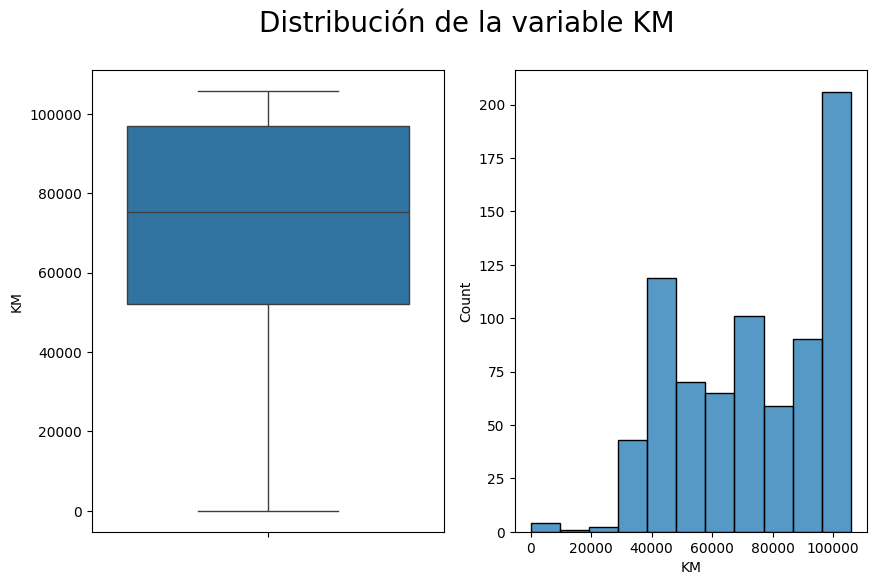

In [105]:
fig, axs = plt.subplots(ncols=2)
fig.set_size_inches(10,6)
plt.suptitle('Distribución de la variable KM', fontsize = 20)


sns.histplot(data = df_km, x="KM", ax = axs[1])
sns.boxplot(y = "KM", data = df_km, ax = axs[0])


La variable parece no seguir una distribución en particular, los kms recorridos por día se encuentran entre 50.000 y 100.000,
siendo este último valor el más frecuente.

Descomposición de Series Temporales

In [106]:
# Modulo para uso exclusivo aqui
from statsmodels.tsa.seasonal import seasonal_decompose

Descomposicion Aditiva

In [107]:
df_km = df_km.asfreq('d')
df_km = df_km.fillna(1)

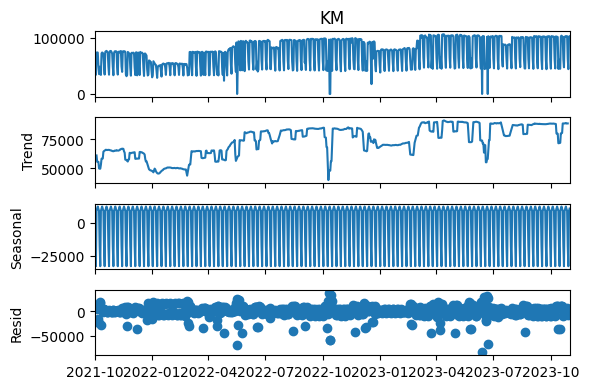

In [108]:
s_dec_additive = seasonal_decompose(df_km.KM, model = "adittive")
s_dec_additive.plot()
plt.show()

Al hacer la descomposición de la serie se pueden observar 4 características:
- El ciclo
- La tendencia   
- La estacionalidad.
- Movimientos irregulares ( el error )

Descomposicion Multiplicativa

In [109]:
import matplotlib

matplotlib.rcParams['figure.figsize']=[12.0,8.0]

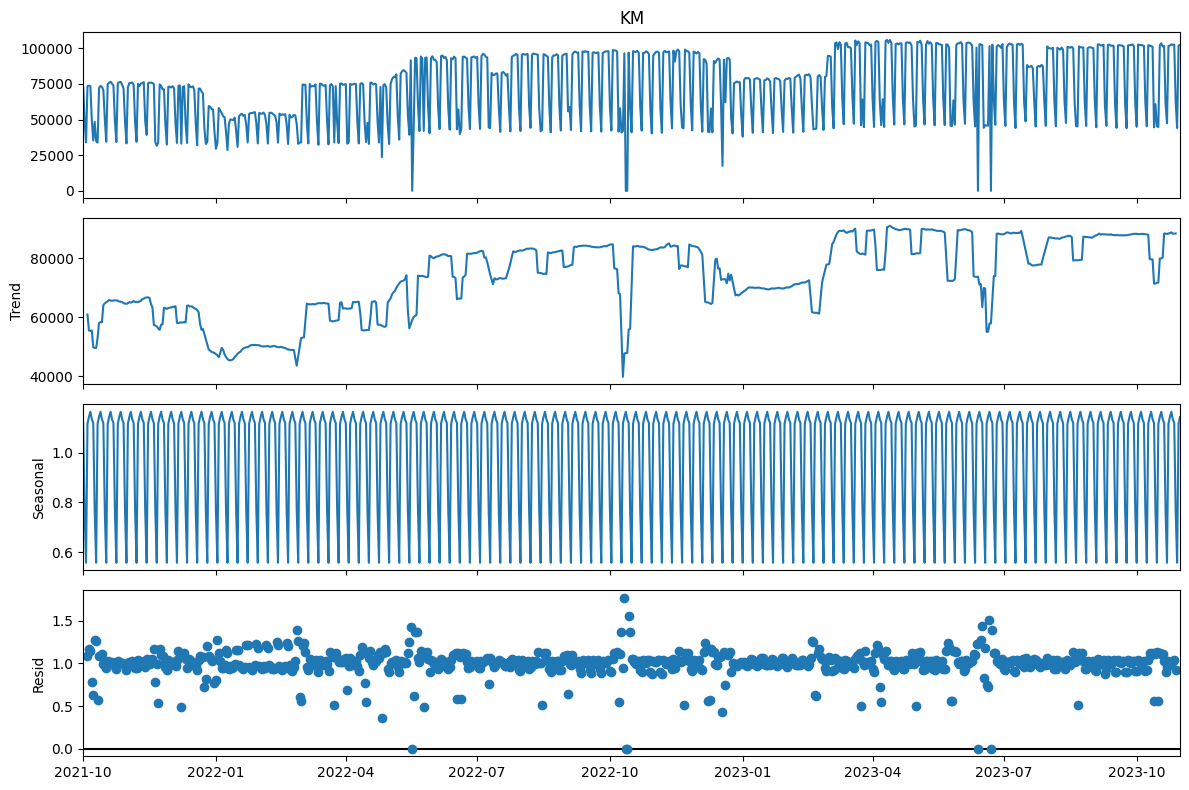

In [110]:
s_dec_multiplicative = seasonal_decompose(df_km.KM, model = "multiplicative")
s_dec_multiplicative.plot()
plt.show()

Se observa una marcada estacionalidad.

Representación gráfica de la Función de Autocorrelación

In [111]:
# Módulos a utilizar
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf

In [112]:
matplotlib.rcParams['figure.figsize']=[6.0,4.0]

Grafico ACF de los KM

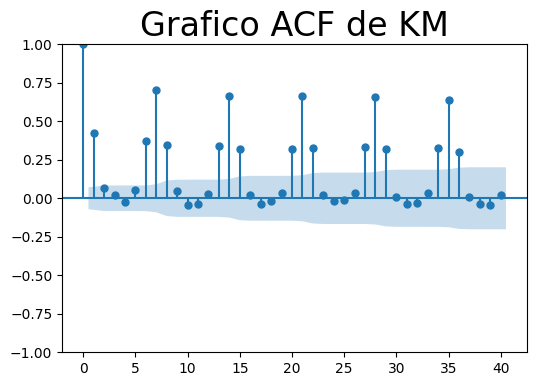

In [113]:
plot_acf(df_km.KM,lags=40)
plt.title("Grafico ACF de KM", size= 24)
plt.show()

Observaciones

El grafico de autocorrelación nos da una primera aproximación de no estacionariedad dado a que se presentan muchos valores por fuera del intervalo de confienza. Tampoco no se alcanza a percibir un decrecimiento lineal con tendencia a bajar en el tiempo.


Grafico ACF del indice "KM" (200 lags)

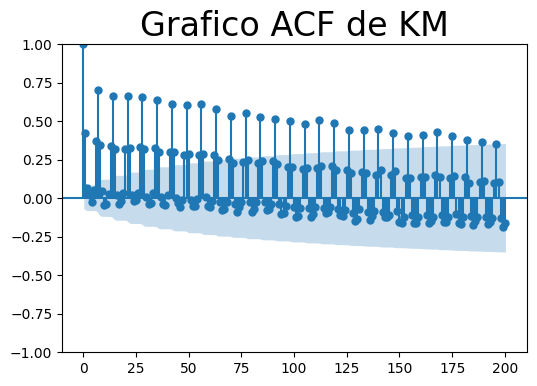

In [114]:
plot_acf(df_km.KM,lags=200)
plt.title("Grafico ACF de KM", size= 24)
plt.show()

Analizando la grafica ACF con 200 lags sigue sin percibirse una estacionariedad en la serie. 
Por lo tanto se necesita aplicar un metodo de transformación para conseguir la misma.
Ahora vamos a calcular cuantas transformaciones se necesitan.

In [115]:
print(pm.arima.ndiffs(df_km.KM))

1


Aplicamos transformación de la serie para lograr estacionariedad

In [123]:
# Diferencia de la serie con periodo 1
km_diff_1= df_km.copy()
km_diff_1=km_diff_1.diff(axis = 0, periods = 1)
km_diff_1.drop(['2021-10-01'], inplace=True)

# Diferencia de la serie con periodo 7
km_diff_7= df_km.copy()
km_diff_7=km_diff_7.diff(axis = 0, periods = 7)
km_diff_7.drop(['2021-10-01', '2021-10-02', '2021-10-03', '2021-10-04', '2021-10-05', '2021-10-06', '2021-10-05'], inplace=True)

# Agregamos la columna de la diferencia en la serie original
#primera_diffs=df_km.KM.values[1:]-df_km.KM.values[:-1]
#primera_diffs=np.concatenate([primera_diffs,[0]])
#df_km['primera_diffs_km']=primera_diffs

In [177]:
df_km.head()

,KM,primera_diffs_km
Fecha,,
2021-10-01,73177.190,-23876.934
2021-10-02,49300.256,-15275.284
2021-10-03,34024.972,39428.543
2021-10-04,73453.515,269.120
2021-10-05,73722.635,-257.072


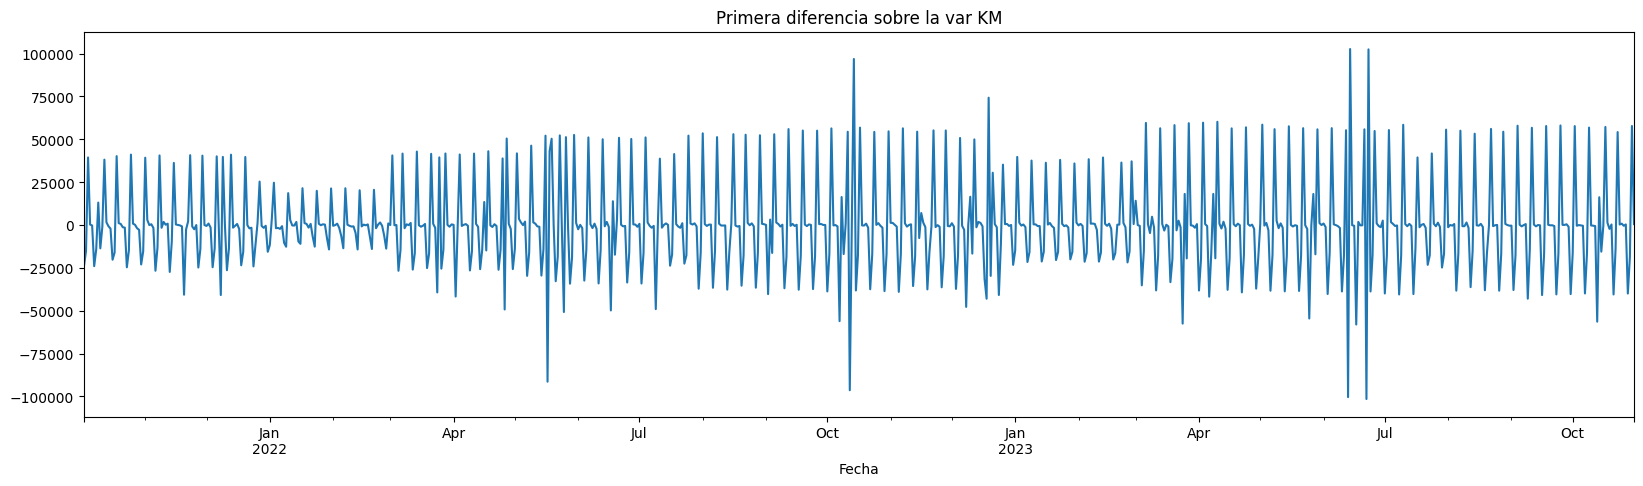

In [124]:
#grafico este indice con las diferencias aplicadas fila a fila
km_diff_1.KM.plot(figsize=(20,5), title = "Primera diferencia sobre la var KM")
plt.show()

Observaciones

La grafica de la primera diferencia de la serie original muestra característica de Ruido blanco que son;
la reversión a la media con un valor constante esperado igual a cero y volatilidad constante en el tiempo.

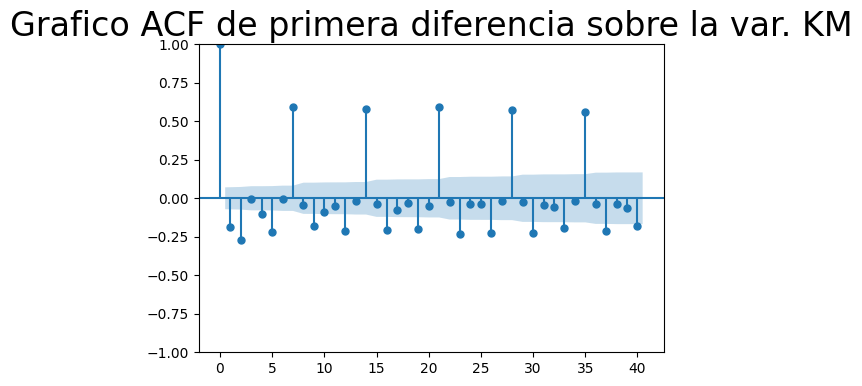

In [125]:
plot_acf(km_diff_1.KM,lags=40)
plt.title("Grafico ACF de primera diferencia sobre la var. KM", size= 24)
plt.show()

Observación

Vemos en la función de autocorrelación de la primera diferencia de la serie original un cambio no tan marcado respecto a la grafica de ACF de la serie original.

Ruido Blanco

In [126]:
wn = np.random.normal(loc = df_km.KM.mean(), scale = df_km.KM.std(), size = len(df_km))
df_km['wn'] = wn
df_km.describe()

,KM,wn
count,761.000000,761.000000
mean,73410.293046,73829.933742
std,24122.636640,23655.660425
min,1.000000,-2890.713093
25%,51774.760000,57673.058089
50%,75190.790000,73495.656306
75%,96904.004000,89429.882403
max,105834.661000,148085.209693


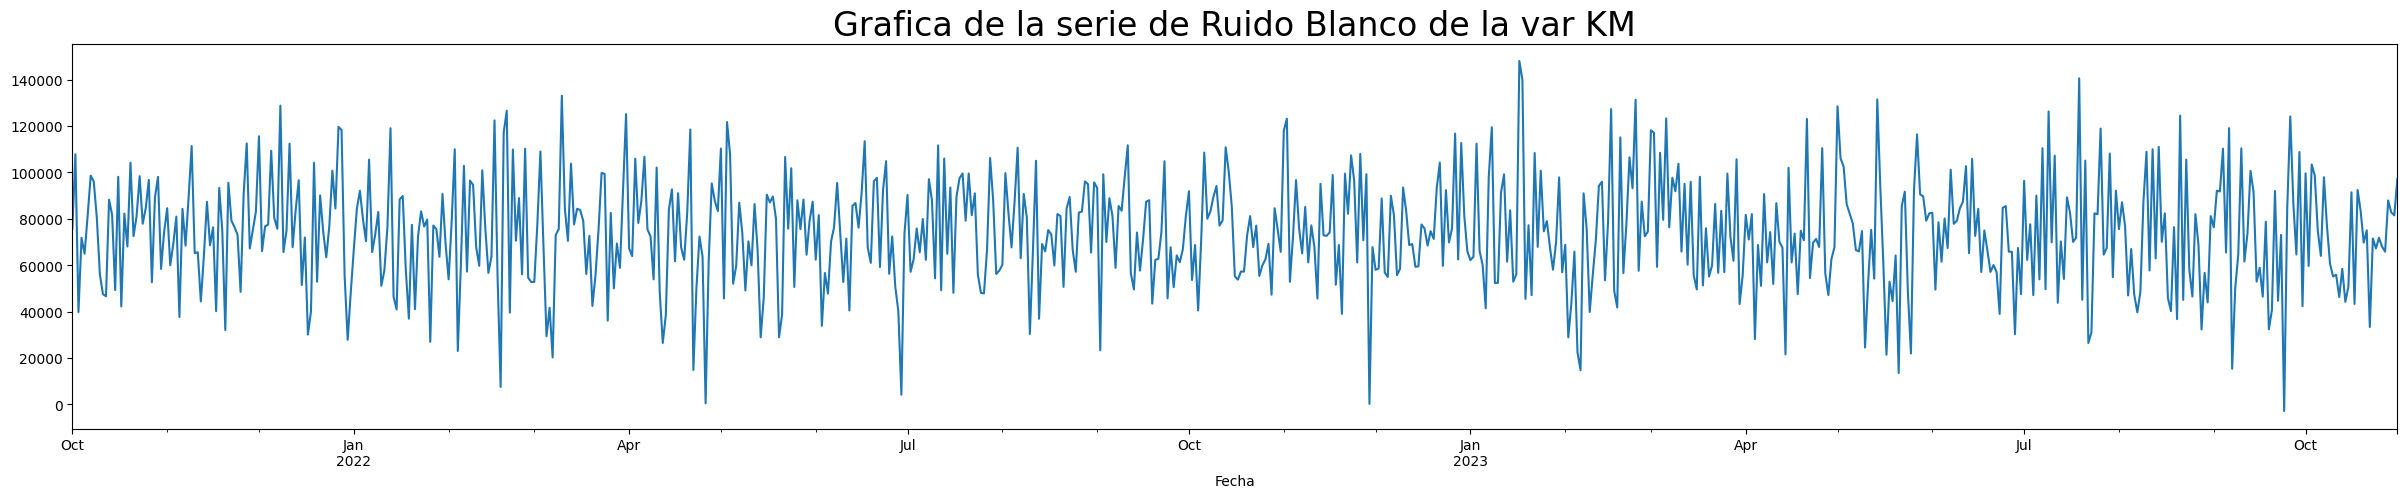

In [127]:
df_km.wn.plot(figsize = (30,5))
plt.title("Grafica de la serie de Ruido Blanco de la var KM", size= 24)
plt.show()

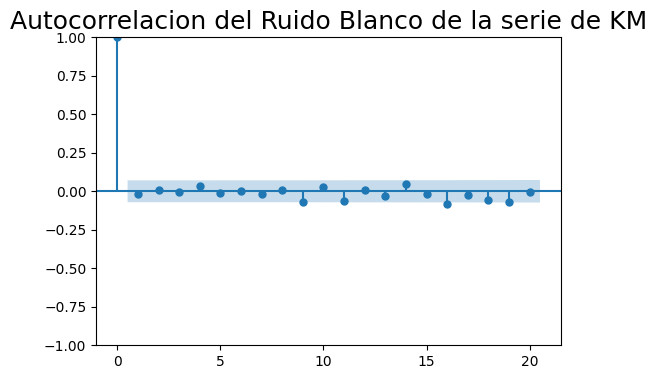

In [128]:
plot_acf(df_km.wn, lags=20)
plt.title("Autocorrelacion del Ruido Blanco de la serie de KM", size= 18)
plt.show()

## Punto 3
Graficas de FAS, FAC y FACP

In [129]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.tsa.stattools as tsa

In [140]:
## Función para dibujar juntos FAS: autocovarianzas; FAC (autocorrelacion ) y FACP (autocorrelación parcial)
def autocov_autocorr(serie_r,serie_nr, nrol= 75 ):
  p1, axes=plt.subplots(3,2,figsize=(18,10),sharex=True, sharey=False )
  axes[2,0].set_xlabel('Lag')
  axes[2,1].set_xlabel('Lag')

  plot_acf(serie_r, lags=nrol, ax= axes[0,0], color='blue', label="ACF", vlines_kwargs={"colors":'blue'}, title='Serie KM')
  plot_pacf(serie_r, lags=nrol, ax= axes[1,0], color='green', label="PACF", vlines_kwargs={"colors":'green'}, title='', method='ywm')
  axes[2,0].plot(tsa.acovf(serie_r,fft=False, nlag=nrol), color='r', label='AutoCov')

  plot_acf(serie_nr, lags=nrol, ax= axes[0,1], color='blue', label="ACF", vlines_kwargs={"colors":'blue'}, title='Serie KM diferenciado')
  plot_pacf(serie_nr, lags=nrol, ax= axes[1,1], color='green', label="PACF", vlines_kwargs={"colors":'green'}, title='', method='ywm')
  axes[2,1].plot(tsa.acovf(serie_nr,fft=False, nlag=nrol), color='r', label='AutoCov')

  p1.legend()
  plt.show()

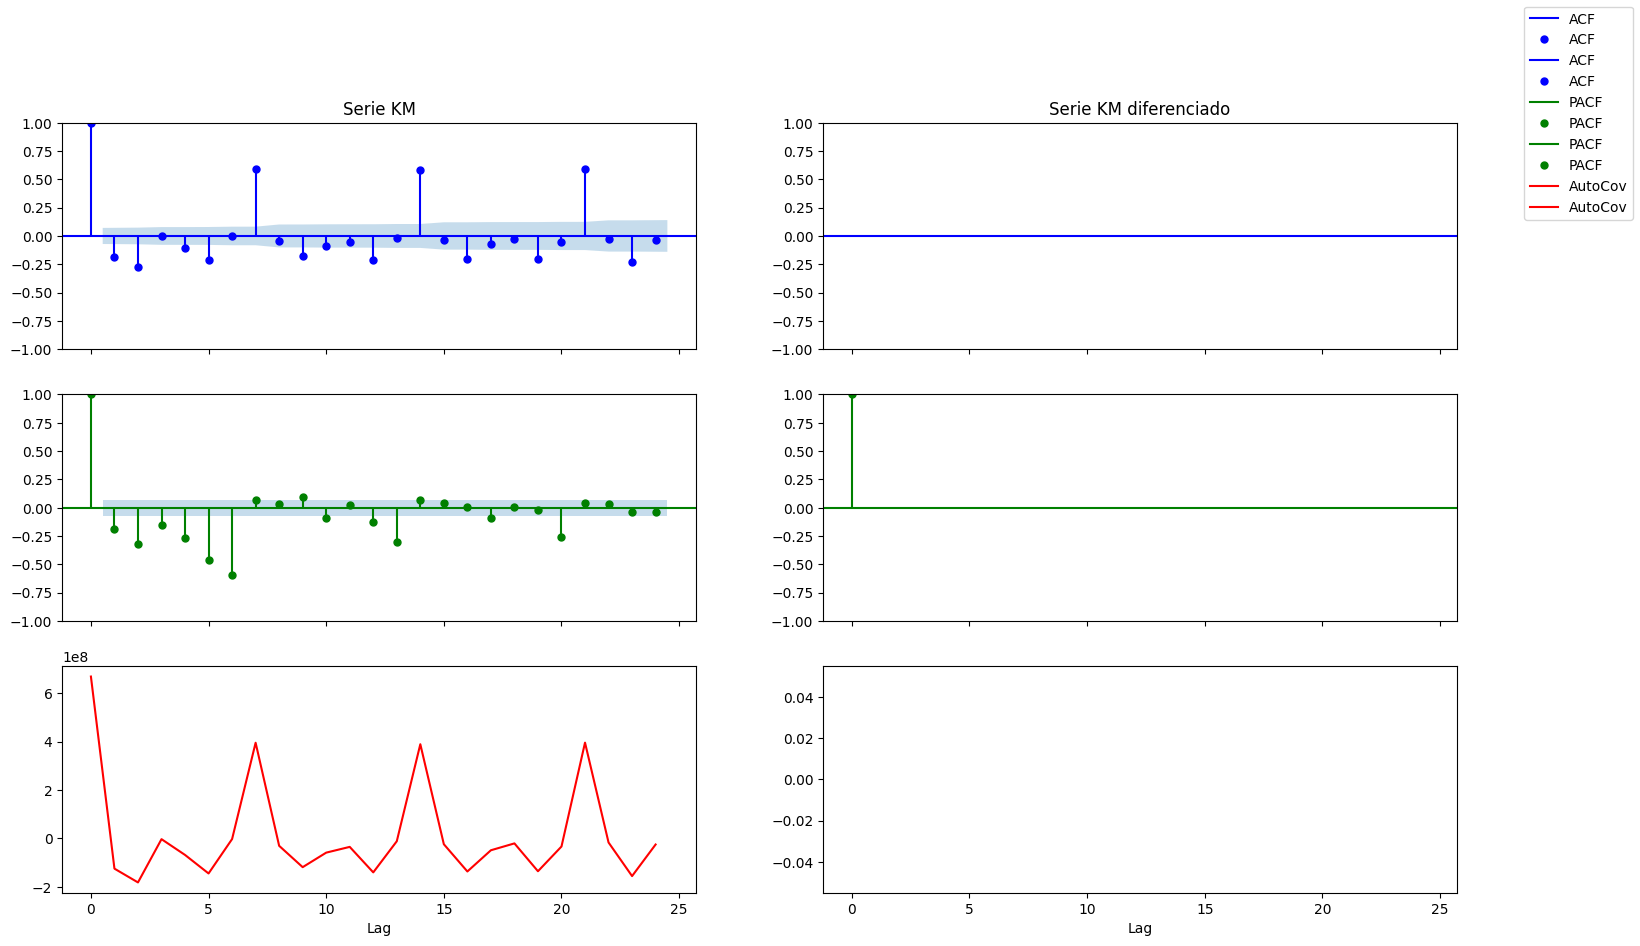

In [142]:
autocov_autocorr(km_diff_1, km_diff_7, nrol= 24 )

# Pregunta 4

Realizar distintas pruebas de raíces unitarias para determinar si las series elegidas son o no estacionarias.

In [144]:
from statsmodels.tsa.stattools import adfuller

In [143]:
def Augmented_Dickey_Fuller_Test_func(series , column_name):
  print (f'Results of Dickey-Fuller Test for column: {column_name}')
  dftest = adfuller(series, autolag='AIC')
  dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','No Lags Used','Number of Observations Used'])
  for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
  print (dfoutput)
  if dftest[1] <= 0.05:
    print("Conclusion:====>")
    print("Reject the null hypothesis")
    print("Data is stationary")
  else:
    print("Conclusion:====>")
    print("Fail to reject the null hypothesis")
    print("Data is non-stationary")

In [146]:
# Aplicamos Dicky Fuller
Augmented_Dickey_Fuller_Test_func(df_km,'KM')

Results of Dickey-Fuller Test for column: KM


ValueError: x is required to have ndim 1 but has ndim 2

In [130]:
# Dicky Fuller de la Serie diferenciada
Augmented_Dickey_Fuller_Test_func(km_diff ,'KM')

Results of Dickey-Fuller Test for column: KM


ValueError: x is required to have ndim 1 but has ndim 2

## Punto 5

Efectuar una estimación de la serie temporal con distintos órdenes de parámetros de modelos SARIMA y encontrar aquel que se ajuste mejor a los datos (pueden emplear Criterios de Información/Selección y analizar significatividad individual global de los parámetros del modelo).

In [149]:
# Separacion Train/Test
# Seleccionamos el primer 80% para train
train = df_km.iloc[:round(len(df_km)*.80)]

# Seleccionamos el 20% restante para test
test = df_km.iloc[round(len(df_km)*.80):]

# Corroboramos que los limites se hayan establecido segun lo planificado
print(train, test)

                    KM             wn
Fecha                                
2021-10-01   73177.190   75691.368840
2021-10-02   49300.256  107877.952052
2021-10-03   34024.972   39785.221281
2021-10-04   73453.515   71787.138305
2021-10-05   73722.635   64968.889383
...                ...            ...
2023-05-28   46429.980   90598.549884
2023-05-29  102266.295   89705.690864
2023-05-30  103408.078   79199.601232
2023-05-31  103403.519   82360.646213
2023-06-01  104291.072   82632.771715

[609 rows x 2 columns]                     KM            wn
Fecha                               
2023-06-02  103121.540  49468.912968
2023-06-03   62877.695  78525.625279
2023-06-04   46983.239  61523.382306
2023-06-05  103512.439  80142.821079
2023-06-06  103902.764  67400.965030
...                ...           ...
2023-10-27  102590.551  65839.625008
2023-10-28   62622.827  87958.353586
2023-10-29   44060.420  82833.456836
2023-10-30  101843.308  81504.873054
2023-10-31  102381.640  97185.630516



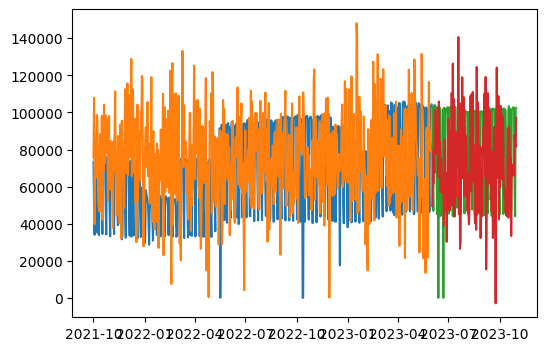

In [150]:
# Visualización Train - Test

plt.plot(train)
plt.plot(test)

In [151]:
from pmdarima.arima import auto_arima, ndiffs, nsdiffs

In [152]:
# Usamos la funcion auto_arima del paquete pmdarima para optimizar la combinacion de hiperparametros para el modelo SARIMA

auto_arima(train, start_p=0, max_p=5, start_d=1, max_d=5, start_q=0, max_q=5,
           start_P=0, max_P=5, start_D=0, max_D=5, start_Q=0, max_Q=5,
           seasonal=True, m=7, trace=True, stepwise=True).summary()

ValueError: y should be a 1d array, got an array of shape (609, 2) instead.

In [153]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [142]:
modelo_sarima = SARIMAX(train, order=(4,1,2), seasonal_order=(1,0,1,7))
modelo_sarima = modelo_sarima.fit()
print(modelo_sarima.summary())

ValueError: SARIMAX models require univariate `endog`. Got shape (609, 3).